# 1. 今回の目的
今回の内容はズバリ**演習**です。  
今までのような新しい内容を学ぶってよりは実際に手を動かす練習をしてみよーって感じですね。(ちょっとだけ新しい内容があります。)  

まず、前回までに習ってきた内容はどんなんでしたっけね？
***
- 第1回：Pythonでよく使われるデータ型である文字列、リスト、タプルの基本。if文やfor文などのC言語でやってことをPythonで書く方法
- 第2回：便利な関数(enumerate, zipなど...)とメソッドと関数の作り方。ライブラリの使い方を少し。
- 第3回：NumPyによる配列や乱数生成の方法。csvファイルの読み込み/書き込み。オブジェクト指向とは。
- 第4回：NumPyとPandasの詳細な使い方
***
こんな感じにお勉強してきました。今までの内容で割とPythonでコーディングする際の道具は割と揃ってたりします。  
そういうわけで、知識ばっかりインプットしすぎてもアレなので、少しアウトプットしてみましょうってわけで演習です。  

本日のお題は以下の3題です。

***
- **お題1：Pythonでいろいろやってみよう**
    - フィボナッチ数列を生成する関数を作ってみよう
    - モンテカルロシミュレーションによる円周率$\pi$の推定
    - 在庫管理シミュレータを作ってみよう
- **お題2：Pandasでいろいろデータ分析してみよう**
    - titanicデータセットの可視化
- **お題3：機械学習を体験してみよう**
    - breast_cancerデータセットを用いて、人の特徴から肺がんかをどうかを予測するモデルを作ってみよう
    - **(コメント)**機械学習なんてよくわかんねーよ！って思うかもしれませんが、どうすれば、機械学習のモデル構築が実装できるのかを演習してもらうだけなので、ここでは前提知識は必要ありません。コーディングも実は一番簡単？？

***

こんな感じです。それではやってみよー。と言いたいところですが、各お題に**可視化**と呼ばれる、グラフを描くプロセスがいくつか出てきます。前回までにも```matplotlib```というライブラリをインポートして、グラフを描画してみたりしましたが、ちゃんと説明はしていないので、最初にその使い方について軽く説明をしておきます。<u>ちゃんと読まずに、使う場面になったら参照してくれればOKです。</u>  
(matplotlib自体、使い方を丸暗記しないで、ググりながら使うものなので。)


# 2. グラフ描画ライブラリmatplotlib
既に何回か見たことありますよね？Pythonでグラフを描きたいときに使うライブラリの１つです。  
「グラフを作成して可視化する」という作業は、何をやるにしても行う作業になりやすいので、よく使われるライブラリの１つですね。  
データ分析においては可視化を頻繁に行うので、NumPyやPandasと組み合わせて使うことも多いです。  

ここでは以下の演習で使えるレベルの最低限の説明しかしないので、疑問に思うことがあったら何でも聞いてください！

## 2-1. 線グラフ(plot)

In [1]:
#  まずはlibrary import から
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

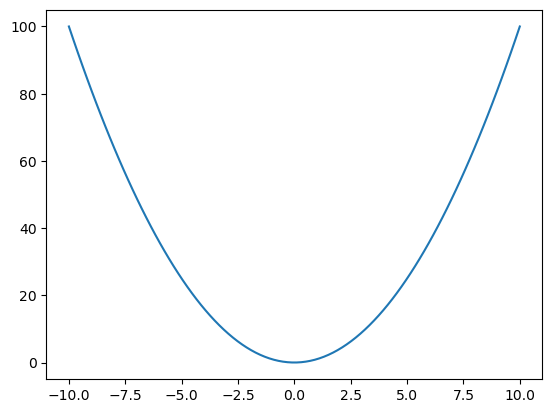

In [2]:
# -10から10まで等間隔に分割し、100個の数列を返してくれる
# 分からなかったら変数の中身表示してみてね
x = np.linspace(-10, 10, 100)
# すべてのxの要素に対して2乗した値をyとする
y = x ** 2 

# 1つ目の引数に横軸となるもの
# 2つ目の引数に縦軸となるものを指定
plt.plot(x, y)

## 2-2. ヒストグラム(histogram)
多くのデータがあるときに、各データの値がどの程度幅をもって分布しているか、どの辺の値に集中しているかなどを確認する際に使えます。

(array([ 3.,  7.,  6., 10., 18., 17., 12., 12.,  9.,  6.]),
 array([147.86032172, 152.09720332, 156.33408492, 160.57096651,
        164.80784811, 169.0447297 , 173.2816113 , 177.5184929 ,
        181.75537449, 185.99225609, 190.22913769]),
 <BarContainer object of 10 artists>)

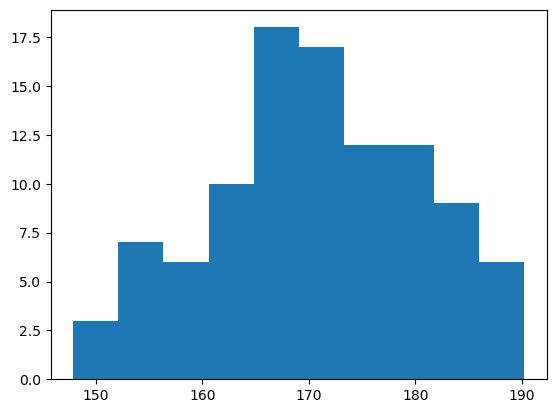

In [3]:
# 100人分の身長のデータを生成してみる
# 平均170、標準偏差10の正規分布に従う乱数を100個生成する
sincho = np.random.normal(loc=170, scale=10, size=100)

plt.hist(sincho)

平均170の正規分布から乱数を発生させているので、170あたりにデータが集まっていますね。  

## 2-3. 散布図(scatter plot)
可視化することで、２変数間の関係を掴むことができる

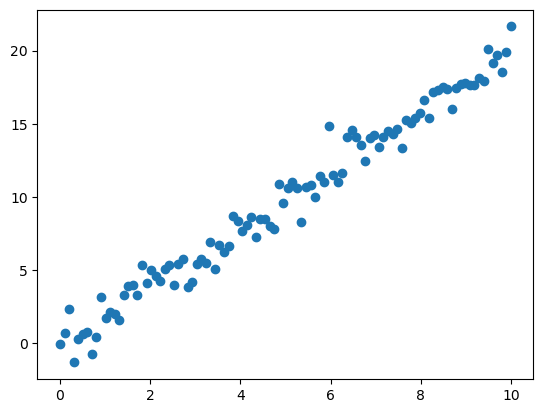

In [4]:
# 0から10まで等間隔に分割し、100個の数列を返してくれる
# 分からなかったら変数の中身表示してみてね
x = np.linspace(0, 10, 100)

# xの各値を2倍した値に0~1の乱数(ノイズ)をのせる
y = 2 * x + np.random.randn(100)

plt.scatter(x, y)

## 2-4. 棒グラフ
いくつかのカテゴリを持つ変数ごとに何かを指標を比較するときに有効

<BarContainer object of 3 artists>

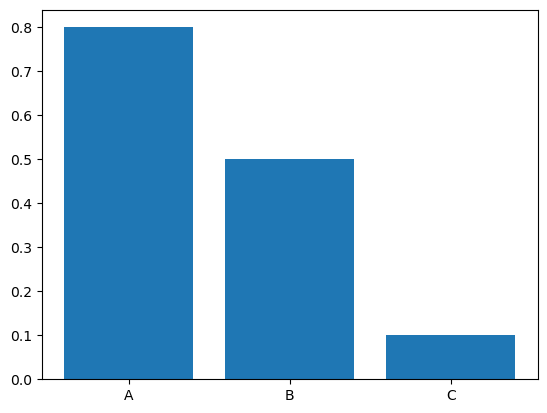

In [5]:
# Aくん、Bくん、Cくん
x = ['A', 'B', 'C']
# 宿題の提出率
y = [0.8, 0.5, 0.1]

plt.bar(x, y)

## 2-5. グラフのオプション
タイトル名や、x軸名、y軸名などといった情報を加えられる  

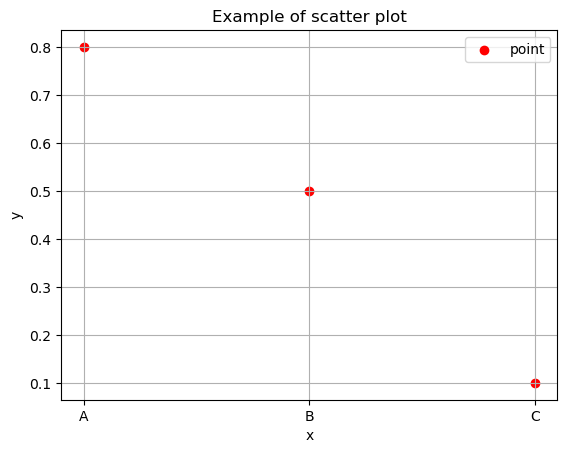

In [6]:
# 2-3の散布図を例に説明

# 引数ｃに値を指定することで色を変えられる
plt.scatter(x, y, c='r', label='point') 

# ｘ軸名
plt.xlabel('x')
# y軸名
plt.ylabel('y')
# グラフのタイトル
plt.title('Example of scatter plot')
# グラフにグリッド線をつける
plt.grid()
# 凡例を表示
# plt.scatter()のlabel引数で指定した文字列が表示される
plt.legend()

### ※legendの補足
左上にあるグラフの説明みたいなのを凡例(legend)と呼びます。同時に複数のグラフを書いたりすると、その区別をするために説明が必要になるので、そのような場合に使います。以下の例を見てくれればわかると思います！  

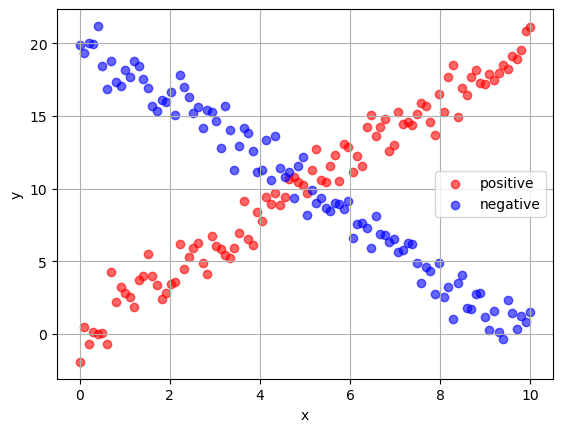

In [7]:
# legendの補足
x = np.linspace(0, 10, 100)
# xの各値を2倍した値に0~1の乱数(ノイズ)をのせる
y = 2 * x + np.random.randn(100)

# 似たようなのをもう１セット作成
x2 = np.linspace(0, 10, 100)
y2 = -2 * x + np.random.randn(100) + 20

# alpha引数で透明度(0~1)を指定できる
plt.scatter(x, y, c='r', label='positive', alpha=0.6)
plt.scatter(x2, y2, c='b', label='negative', alpha=0.6)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# 3. お題1：Pythonでいろんなことをやってみよう
まずはPythonの基本であるリストやif文, for文を組み合わせた問題についてコーディングしてみましょう。
## 3-1. フィボナッチ数列を生成する関数を作ってみよう
フィボナッチ数列ご存知ですかね...？？ 分からない人向けに説明すると、フィボナッチ数列は以下の規則(漸化式)で生成される数列のことです。

$$
a_n = a_{n-1} + a_{n-2} (n\geq 3)\\
a_1 = 1, a_2 =1
$$

さてここでのお題は、入力に表示する項数を指定し、出力として、その項数までのフィボナッチ数列を返り値とするような関数を作ってください。  
イメージはこんな感じです。(作った関数名は```my_fibo```としています)
```
>>> my_fibo(4)
    [1, 1, 2, 3]
```
という感じに入力に4と指定すると、フィボナッチ数列の第4項までを含んだリストが返ってくる関数を作るって感じですね。  
それではやってみましょう!!


In [8]:
# 関数を定義してみよう
memo = {}
def my_fibo(x):
    if x == 0 or x==1:
        return x
    if x in memo: # メモ化
        return memo[x]
    memo[x] = my_fibo(x-1) + my_fibo(x-2)
    return my_fibo(x-1) + my_fibo(x-2)

def my_fibos(n):
    fibo = [1,1]
    if n<=1:
        return fibo[:n]
    for i in range(2,n):
        new_fibo = fibo[i-1] + fibo[i-2]
        fibo.append(new_fibo)
    return fibo
my_fibo(100)
my_fibos(5)

[1, 1, 2, 3, 5]

おまけにフィボナッチ数列が項数を追うごとに、どれだけ数字が大きくなっていくかを可視化してみましょう。  
どんどん項を足し算していくので、項番号が大きくなれば、数値もどんどん大きくなっていくことは予想できますね。  
横軸を項番号、縦軸をフィボナッチ数列の対応する項の数値とした線グラフを書いてみましょう！

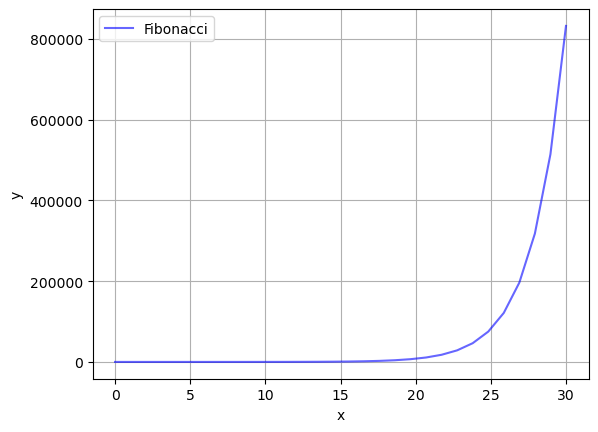

In [9]:
import sys
sys.setrecursionlimit(2000000)
# フィボナッチ数列の増加傾向を線グラフにしてみよう
# legendの補足
x = np.linspace(0, 30, 30)
# xの各値を2倍した値に0~1の乱数(ノイズ)をのせる
# my_fibo関数をndarrayに適用し、その結果をyにする
my_fibo_vec = np.array(my_fibos(30))

# グラフを描画
plt.plot(x, my_fibo_vec, label='Fibonacci', alpha=0.6, color='b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# グラフを表示
plt.show()

## 3-2. モンテカルロ・シミュレーションで円周率 $\pi$ を推定してみよう
お次のお題は円周率πの推定です。１年生の情報処理基礎演習の授業でも同じ内容を扱ったような気がしますね。気のせいかもしれません。笑  
円周率なんてどうやって求めんだって感じだと思うので、その方法について説明しておきます。  

まず、下記のような内部に四分円を含んだ長さ1の正方形を考えます。  
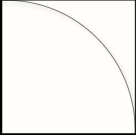  
なぜそうなるのかは省略しますが、この正方形の内部に適当に点を打って、$nc$を円の内部にある点の個数、$n$を打った点の個数とすると、円周率は

$$
\pi \simeq 4 \times \frac{nc}{n}
$$

となります。この推定式を利用して、実際にいっぱい点を生成して $\pi$ を推定してみよう、というのがこのお題です。  
打つ点の個数については大きい数なら何でもいいですが、とりあえず100000にしておきます。  
ちなみに$\pi=3. 1415926535...$なので、このあたりの値がでてくれば、うまくできていることでしょう。  

それではやってみましょう！  


**(ヒント)**
- 適当に点を生成するには、乱数を使えばよさそう？　(0,1)の範囲に点を打つには```random```ライブラリでできたような...？
- 数学では単位円の内部にあるというは $x^2 + y^2 \leq 1$ という不等式で表現できる

IN: 803 
OUT: 197 
ALL: 1000 
Pi: 3.212 


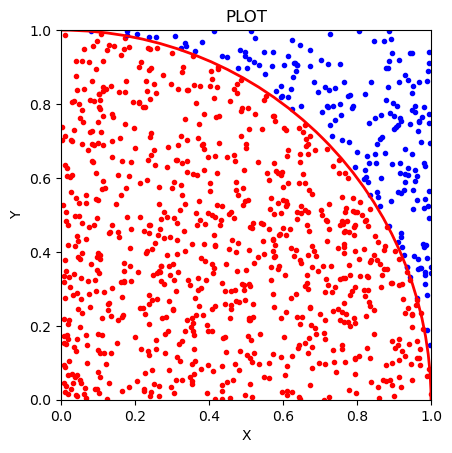

In [10]:
# 円周率を推定してみよう
import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

N_in = 0
N_out = 0
N = 1000 #試行回数
saikoro_x = random.rand(N) #Xの乱数
saikoro_y = random.rand(N) #Yの乱数
ran_point = np.hypot(saikoro_x,saikoro_y) #X^2 + Y^2の平方根

for idx, i in enumerate(ran_point):
    if i <= 1:
        N_in += 1
        plt.scatter(saikoro_x[idx], saikoro_y[idx], marker=".", color = "red", label = "POINT")
    else:
        N_out += 1
        plt.scatter(saikoro_x[idx], saikoro_y[idx], marker=".", color = "blue", label = "POINT")

Pie = N_in/N*4 

print("IN: {} ".format(N_in))
print("OUT: {} ".format(N_out))
print("ALL: {} ".format(N))

print("Pi: {} ".format(Pie))

c1 = plt.Circle((0, 0), radius=1, fc="None", ec="r", linewidth=2, color = "black")
ax = plt.gca()
ax.add_patch(c1)
plt.axis("scaled")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("PLOT")
plt.show()



お次に、「円周率 $\pi$ を推定する」という処理を100回程度繰り返してみましょう。  
ループ処理の度に打たれる点は異なるはずなので、毎回推定される $\pi$ の値も微妙に異なってくるわけです。  
そして得られた100個の推定値に関してヒストグラムを描いてみましょう！  

In [15]:
# 円周率の推定値のヒストグラムを描いてみよう
def Pie_Simulation(n = 100):
    x = []
    for i in range(n):
        N_in = 0
        N_out = 0
        N = 100 #試行回数
        saikoro_x = random.rand(N) #Xの乱数
        saikoro_y = random.rand(N) #Yの乱数
        ran_point = np.hypot(saikoro_x,saikoro_y) #X^2 + Y^2の平方根

        for idx, i in enumerate(ran_point):
            if i <= 1:
                N_in += 1
            else:
                N_out += 1

        Pie = N_in/N*4 
        x.append(Pie)
    return x


/var/folders/s1/djkjg2h51pn25363mc8_5sf00000gn/T/ipykernel_9331/74901149.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


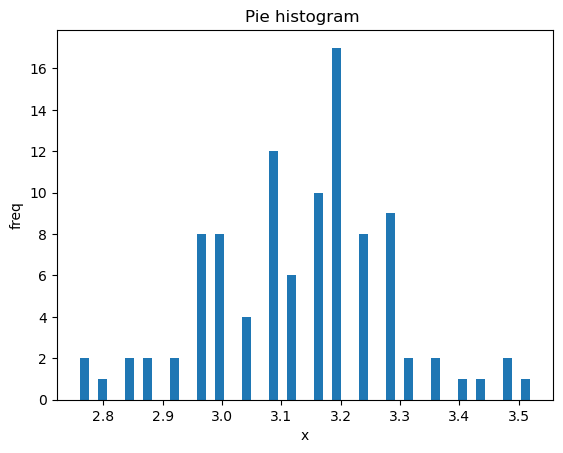

In [17]:
import numpy as np
import matplotlib.pyplot as plt


x = Pie_Simulation()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(x, bins=50)
ax.set_title('Pie histogram ')
ax.set_xlabel('x')
ax.set_ylabel('freq')
fig.show()


## 3-3. 在庫管理シミュレータを作ってみよう

特にシミュレーション関連に興味ある人向け。  
シミュレーション研究では、こちらで作り出した処理を関数にして繰り返すことが多いので、それの練習的なことをやってみましょう。

状況設定は以下↓
>あるお店で売っているお菓子の10日間の在庫管理をしたい  
>1日に1回、開店前に仕入れ・在庫補充を行い、  
>1日あたりに売れる個数は次の表のように決まっているとする。  
>ただし、在庫がない場合はそれ以上は売れない。 


| 個数 | 確率 |           
| :----: | :----:|           
|  8  |  0.1  |          
|  9  |  0.2  |
|  10  |  0.4  |
|  11  |  0.2  |
|  12  |  0.1  |  

上のように設定が決まっている時、
仕入れや販売を10日間繰り返した時の1日ごとの在庫状況をリストにまとめてみましょう。  

ここでは、仕入れを行う関数を```purchase```、販売を行う関数を```sales```と定義しています。  
初期在庫数、在庫補充の仕方については、自由に決めて大丈夫です。  

関数へ受け渡す引数は**リスト**のみとして進めてみてください...！(詳しくは、「参照渡し」等で調べてみてね。。)

In [48]:
# 10日間行う仕入れと販売の処理を関数にしよう
class Zaiko():
    def __init__(self, one_unit):
        self.stock = [15]
        self.one_unit = one_unit
        self.order_point = 5

    def showStock(self):
        return self.stock
    
    def purchase(self):
        # 前日の在庫＋発注量　＝　新しい在庫量
        self.stock.append(self.stock[-1]+self.one_unit)
        # 在庫補充をした後、新しい在庫をリストに追加しよう(ここは自由)

    # 販売を行う関数
    def sales(self):
        # 販売個数の確率設定(上の表と対応しています)
        number = range(8,13)
        prob = [0.1, 0.2, 0.4, 0.2, 0.1]
        # ランダムで販売個数決定 
        order = np.random.choice(number,p=prob)
        # (ヒント:項目と確率が定められている時は、np.random.choice がオススメ)
        
        # 販売個数分在庫を減算 (在庫が足りない場合は0に)
        if self.stock[-1] < order:
            self.stock[-1] = 0
            self.purchase()

            return self.stock[-1]
        else:
            self.stock[-1] -= order
            # 発注点
            if self.stock[-1] <= self.one_unit:
                self.purchase()
            return order
        

In [59]:
# 10日間在庫管理しよう
shop = Zaiko(12)
for i in range(10):
    saled = shop.sales()
    print(f"販売量：{str(saled).rjust(2,' ')},在庫量：{shop.showStock()[-1]}")


販売量： 9,在庫量：18
販売量： 9,在庫量：21
販売量： 9,在庫量：24
販売量：12,在庫量：24
販売量：10,在庫量：14
販売量： 9,在庫量：17
販売量：10,在庫量：19
販売量：10,在庫量：21
販売量： 9,在庫量：24
販売量：10,在庫量：14


In [51]:
# おまけ
# 10日間の在庫の増減を棒グラフで表そう

# 4. お題2：Pandasでいろいろデータ分析してみよう

このお題では、有名なtitanicデータセットと呼ばれるものを使って、データの特徴を可視化する練習をしてみます。  
このデータには各乗客の性別、年齢、チケットのクラス(Pclass)、どの港から出港したか(Embarked)、などの色々な乗客に関する情報とtitanic号事件において、生存したか、亡くなってしまったのかを表す変数(Survived)があります。  

そこで、どのような乗客が生き残ったのか、またどのような乗客が亡くなってしまったのかなどを掴むために、変数ごとに要因を切り分けて、可視化を行ってみよう、というのがここでのお題となります。  

さて、いったいどんな特徴があるのかは、問題に対してよく考えなければわかりませんが、色々データの集計などが必要そうです。例えば、性別で生存率に違いはあるのかを確かめたい、なんてときには、男女でデータを分けて計算したり、なんてことがあります。  
こういう集計に便利なライブラリがありましたね。そうです```Pandas```です。データフレーム(表)ベースでデータを管理し、フィルターをかけたり、集計作業を行ったり、新たな量を計算してみたり、なんて作業は前回やりましたね？ とても便利ですね。  


さっそく、乗客の情報が格納されたtrain.csvを読み込んでみましょう。

In [ ]:
# まずはlibrary import
import pandas as pd
df = pd.read_csv('train.csv')

In [ ]:
df.head()

In [ ]:
df.shape

はい、読み込みましたね。データフレームの中身を見てもらえればわかりますが、色々な変数(IDや性別)が列に格納され、行に各乗客に情報があるという構造になっています。一般的に表やデータフレームを作る際にもこうような構造になるように意識しておきましょう。  
今回のデータは変数が12で、データ数は891になっています。こういう情報は分析を始める前に最初に調べておきましょう。
```
>>> df.shape
    (891, 12)
```
というコードで表の構造を簡単に調べることができます。NumPy配列の形状を調べるのと同じメソッドですね。  

まず、各変数の説明をしておきます。
- PassengerId: 乗客を一意に識別するID番号
- Survived: titanic号の事件において生き残ったならば1、そうでないなら0を表すバイナリ変数
- Pclass: チケットの階級。1が一番高く、3が一番低い階級。
- Name: 乗客の名前
- Sex: 性別
- Age: 年齢
- SibSip: 乗船している兄弟や配偶者の数
- Parch: 乗船している親や子供の数
- Ticker: チケット番号
- Fare: チケット料金
- Cabin: 部屋番号
- Embarked: 乗船した港
 

## 4-1. 欠損値の処理
実は前回説明したnanがこのデータにも含まれています。  
nanがあると何かと厄介ですので、とりあえず、どの変数にどれだけnanが含まれているのかを確認してみましょう。 

In [ ]:
# 各列でnanがどれくらいあるか確認してみよう


確認できましたかね。比較的nanも多く、情報としては使いづらいCabinはあまり必要がなさそうに見えます。また、Age, Embarkedに関しては欠損している行を削除すればよさそうです。  
それでは
- Cabinの列を削除する
- Age、Embarkedがnanとなっている行を削除する

の2つの処理を行ってみましょう

さて、これでnanがデータフレーム上から消去することができましたかね。意外と大事な処理なので、ちゃんとできるようにこころがけましょう！  

ここからがお題２の本題です。以下に関するグラフを作成してみましょう。
- Survivedの値(0/1)別に、Ageのヒストグラムを描く
- Sex, Pclassの値ごと(合計6通り)に対して、Survivedの平均を求めてヒートマップ(heatmap)を描く
- Fareが108以上の乗客のPclassを0に置換して、Pclassごとの年齢に関する箱ひげ図(boxplot)を描く

上記のmatplotlibの説明にはないヒートマップや箱ひげ図を描くので、そこは自力で調べてみましょう!(seabornというライブラリを使うとラク....？）  
また、ちょっとネタバレすると、コードの行数的にはすべて2, 3行くらいです！！  

それではやってみましょう！


## 4-2. Survivedの値(0/1)別に、Ageのヒストグラムを描く
データフレームをSurvivedの値でフィルターをかけて、Ageの列を抜き出して、```plt.hist()```に投げる

In [ ]:
# Survivedの値別に、Ageのヒストグラムを描いてみる


## 4-3.  Sex, Pclassの値ごと(合計6通り)に対して、Survivedの平均を求めてヒートマップ(heatmap)を描く
縦方向に性別のカテゴリ値、横方向にPclassのカテゴリ値をとり、対応する部分のセルにSurvivedの平均が入る 

- 〜〜の値ごとに何かの値を集計するのはgroupbyでできたような...？
- メソッド unstack() で行(縦方向)の属性を列(横方向)に持ってこられる
- ヒートマップはseabornというライブラリを使うのが◎

In [ ]:
# ヒートマップを描いてみよう


## 4-4. Fareが108以上の乗客のPclassを0に置換して、Pclassごとの生存率の平均に関する棒グラフを描く
- Fareが108以上の人を抽出するにはFareにフィルターをかけて、抽出された乗客のPclassを0に置換すればよさそう
    - フィルターをかけて値を操作するにはlocというメソッドを使う？？
- ここでは、棒グラフ描画も seaborn ライブラリを使ってみよう

In [ ]:
# Fareが108以上の人のPclassを0に置換してみよう


In [ ]:
# PclassごとにSurvivedの平均に関する棒グラフを描いてみよう


# 5. お題3：機械学習を体験してみよう
ここでのお題は、入力となる様々な情報から、肺がんかどうかを予測するモデル(AI)を構築してみよう、という機械学習に関するお題です。  
「機械学習なんて、知らねえよ！！！！」と思うかもしれませんね。興味なかったらごめんなさい。。  
モデルを構築してコードを実行するのはとても簡単だってことを知ってもらうためにここで問題を設定しています。  
ですが、どのようなコードを書けば良いかの説明は敢えてしないので、このお題では**調べながら進めていく**ことが中心になります。  
Qiitaなどで調べれば山程、解説した記事が出てくると思うので、それを参照しながら進めてみましょう。  

機械学習ではよく「入力となる情報(**特徴量**と呼ばれます)から、なにかの値を予測する」ということを行います。そのために入力となる情報と予測対象が必要です。統計学の言葉ではそれぞれ**説明変数**、**目的変数**なんて呼ばれます。聞いたことのある言葉ですね。 

これらを何に設定して、どんな予測モデルを構築するか、というのは実はとても難しい問題です。研究を行うときにもよく問題になったりする点です。なにが難しいかというと、ネタを考えなきゃいけないことだったり、ネタを思いついても誰かがもうやってしまっていたり、予測モデル自体に有効性がない、なんていう点です。まぁ今回はネタをすでに用意してあるので特段意識はしなくても問題ないですが、研究とかで扱うなら大変だってことを頭の片隅にいれておきましょう。  

機械学習を用いたデータ分析は下記のフローで進むことが多いです。(フローがよくわかんなかったら聞いてね)
1. データセットの確認と可視化など探索的分析(EDA)
2. (必要があれば) データに対する前処理や新たな特徴量の検討
3. 学習データとテストデータの分割
4. 学習データのみを用いて、機械学習アルゴリズムでデータの学習
5. テストデータに対する予測を行い、実際の結果と比較することで予測精度を評価
6. 予測精度が十分でないならば、2に戻る。良ければ終わり。


このお題では、例題として「**各人の入力情報(特徴量)から肺がんかどうかを予測する**」モデルの構築を行ってみます。まずはフロー通り、どんなデータを取り扱うのかを見てみましょう。  
以下のコードを実行してみてください。

## 5-1. データセットの確認と可視化

In [ ]:
# データセットの読み込み
import pandas as pd
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

# 入力(中身は気にしないでOKです)
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
# 出力(肺がんかどうか)
y = pd.Series(breast_cancer.target)

In [ ]:
X

In [ ]:
y

さて、データセットをPandasの形式でロードできましたかね。変数```X```の中身を見てみると、なにやらいろいろ情報が入っていますね。  
各列に色んな種類のが、各行にはいろんな人の情報が含まれています。機械学習を行う上で、このような表形式を用いることが多い、ということは覚えておきましょう。  

まず、データの数と入力情報の数がどれくらいかを調べることは大切です。調べてみましょう。

In [ ]:
# データ数について調べてみよう


お次に、変数```y```の中身を見てみましょう。どうやら0と1が入っているっぽいということは分かります。実は1が肺がんであること、0が肺がんではないことを意味しています。  
さぁ分析をいろいろ始める前にそもそもこの0と1はどれくらいの割合でいるんだろう、という疑問は出てくると思います。  
変数```y```に対して、0の人数と1の人数をカウントしてみましょう。できれば棒グラフにしてみてください。(可視化すると、わかりやすいので。)

In [ ]:
# 変数yの0/1について人数をカウントしてみよう


↑本来は変数```X```の各列ごとのヒストグラムや相関を見てみる作業もありますが、ここでは省略します。  

次のフローの2番目「データに対する前処理、新たな特徴量の検討」ですが、 
ここの内容は、どんなタスクかによって変わってきます。
研究などではタスクが明確なので結構大事な箇所ですが、ここでは一旦スキップします。

## 5-2. 学習データとテストデータの分割

さて、今持っている変数の情報だけで十分だと仮定すると、変数```X```から変数```y```である肺がんかどうかはどの程度予測できるのでしょうか？  
ここからはその検証に入ってみます。  

機械学習では、モデルがパターンを認識するために一定のデータ(X, yの組)が必要になります。  
そのパターンを覚えるプロセスを**学習**、学習のために使うデータを**学習データ**と呼びます。  
ここで行いたいのは、肺がんかどうかの予測精度がどの程度かという検証ですが、  
学習に使ったデータについては、モデルの適用により予測が当たりやすい状態になっているので、予測精度を測定するには適切ではありません。  
そのため機械学習では、学習には使わない 予測精度測定のためのデータ**テストデータ**が別に必要です。  

そこで、ここまで扱ってきた変数```X, y```をそれぞれ学習データとテストデータに分割してみましょう。  
学習データとテストデータの比率を8:2にしてみましょう。そして、各データの数がいくつになるのかを調べてみましょう。  

※変数名としては```X_train, X_test, y_train, y_test```とするのが一般的なような気がするので、ここでもそれに倣いましょう。

In [ ]:
# Xとyを学習データ/テストデータに分割してみよう
# sklearn.dataset の中に分割のための関数があるよ。調べてみよう


In [ ]:
# 学習データとテストデータの数


## 5-3. 機械学習アルゴリズムでデータの学習
学習データとテストデータを生成することができた、ということでお次のフロー4番に入ります。  
ここでは、実際に学習データを用いて、学習を行うフェーズになります。  
どんなモデルを使うか、というのには色々な選択肢がありますが、ここでは**ランダムフォレスト(Random Forest)**と呼ばれるアルゴリズムを用いて学習を行ってみましょう。  
これを使うには、
```
sklearn.ensemble.RandomForestClassifier
```
にあるライブラリーをimportする必要があります。学習を行うためのコードはなんと**1行**で書くことができます。

In [ ]:
# ランダムフォレストで学習データに対し、学習させてみよう
from sklearn.ensemble import ...

## 5-4. テストデータに対する予測と精度の評価
さて、学習ができたところで、次のフロー5番にいってみましょう。  
ここでは、学習した機械学習モデルに対して、先程分割した、テストデータの入力(```X_test```)に対して、実際に肺がんかどうかを予測を行います。  
それでは予測を行うコードを書いてみましょう。なんと予測のコードも1行です...  
テストデータに対する予測値の変数名は```y_pred```とすることが多いです。


In [ ]:
# テストデータに対して予測を行ってみよう
y_pred = ...

変数```y_pred```の中身を見てみると、変数```y, y_train, y_test```などと同様に0か1の値が入っていますね。  
これはテストデータの入力だけの情報を使って、肺がんかどうかを予測した結果が含まれており、1ならば肺がん、0ならば肺がんでないと機械学習モデルが予測しています。  

次にこの予測がどれだけ正しいのかを調べたいと思います。今回、学習データとテストデータに分割した際に、```y_test```という変数名で、変数```X_test```に対して実際に肺がんであったかどうかの**正解**を持っています。  
この正解と予測結果を比較してあげれば、モデルの予測精度を調べることができそうですね。  
ですが、どのように比較してあげればよいのかはケースバイケースですが、ここでは、**正解率(accuracy)**という評価指標を用いて、評価することにします。  
正解率は単純な評価指標で
$$
正解率=\frac{予測と正解が一致しているデータ数}{テストデータ数}
$$
で計算することができます。解釈としては、予測結果が正解に一致していた割合です。  
それでは正解率を計算してみましょう。正解は```y_test```、予測結果は```y_pred```に格納されていますね。  
(正解率くらいであれば、ライブラリを使わなくても実装できそうですが、ライブラリを使って投げるだけで簡単に計算してくれる便利なモノもあります。)

In [ ]:
# 正解率を計算してみよう


正解率が出ましたかね。実行PCによって結果が異なるかもしれませんが、概ね97~98%かそれ以上の精度が出ているかと思います。  
これの意味するところは、「学習に用いなかった未知のデータセットに対して、肺がんかどうか予測を行ったところ、98%程度の予測が正解していた」ということになりますね。  
これくらい精度が出ていれば、入力に用いた情報を使って、肺がんかどうかを予測できる、といっても良さそうであり、実際に運用もできそうですね。  

***
以上で、このお題は終了です！  
どうでしょうか。機械学習に慣れていなくて、何をやっているのかよく分からなかったかもしれませんが、たったこれだけのコード数で世間で騒がれる機械学習ってヤツを実装できるんだ、って印象は掴めましたでしょうか？  
また、このお題を通して、機械学習という分野に興味をもっていただければ幸いです。  

以下に、いくつか注意点を記しておきます。

**<注意点>**  


- 今回は肺がんかどうかを予測するタスクに取り組んでみましたが、これはすでに他の誰かによって解かれたタスクであるので有名なデータセットとなっており、それを用いています。研究などで機械学習をやってみる場合には、基本的に解けるかどうかは最初は分からないタスクに挑戦することが多いです。頑張りましょう。  

- 入力に使った情報(特徴量)に関してはあまり深堀りしませんでしたが、予測を行うにあたって使う情報であるので、実はとても大切で予測精度を改善する場合には特徴量を見直すことがかなり大事だったりします。どんな情報を使えば、予測ができそうかを考えるのは意外と大変です。結構タスクに関する文献やサイトを調べて、何が使えそうかを調べたりすることが多いです。  

- 機械学習モデルはランダムフォレストを用いましたが、他にも様々なアルゴリズムがあります。たとえば、統計の授業でやったような**重回帰分析(linear regression)**があります。他には後藤先生の授業をとってた人は知っているかもしれないですが、**SVM、決定木**など様々です。多くのモデルは```sklearn```というライブラリから簡単に利用することができます。ですが時にはsklearnにない機械学習モデルを使わなければならないこともあります。例えば、有名な**ディープラーニング(Deep Learning)**は```Tensorflow, Keras, Pytorch```といったライブラリを用いたり、**勾配ブースティング決定木**というアルゴリズムでは```XGBoost, LightGBM, CatBoost```といったライブラリを使います。どのタスクにどのアルゴリズムが良いのかは、実際に検証してみないと分からないことが多いです。研究で使う際には、先行研究などを参考にしてみたりするといいかもしれませんね。

- 予測結果の評価指標には今回は正解率を用いましたが、これもタスクによっては適切ではない場合があります。タスクによって、いろいろ調べてみましょう。  
例えば、家の家賃を予測したいなんてときには、**平均2乗誤差(RMSE)**や**平均絶対誤差(MAE)**を用います。また、肺がんかどうかの**確率**が出力である場合は、**対数損失(log_loss)**という指標を用いることが多いです。  
その他、自然言語処理などではもっと特化した指標が存在するので、何を用いるかはその分野でよく使われている指標を調べてから決めることが多いです。

- 基本的な機械学習は思ったより簡単にできます。なので、モデル構築ができるスキルはそれほど重要視されません。むしろデータの前処理をしたり、特徴量を考えたりする部分のほうが重要視されるくらいです。なので、文系の人間でも機械学習のコードを書けるという人は意外に多いです。機械学習を使って、タスクを達成したり、アプリケーション化して運用できる、ということは素晴らしいスキルですが、コードが書ける事自体はスキルとは言い難いので、就活の面接などでは注意しましょう。


***
以上です！　演習お疲れさまでした！